# REVIEW RATING USING LOGISTIC REGRESSION

In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#Importing pre-processed train data

df=pd.read_csv("./train_preprocessed_v2.csv")
df.head()

,Unnamed: 0,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
0,0,d9a0f14b836e2634b89a6a7d4d9aa184,23308084,7bde8725cbb9ceb697c72c12262dff53,My complaint isnt trilogyI want Fantastic end...,Thu Jul 23 22:27:34 -0700 2015,Wed May 04 20:04:40 -0700 2016,Wed May 04 00:00:00 -0700 2016,Mon Apr 25 00:00:00 -0700 2016,1,1,5
1,1,3af7e1cda1d80d6a6d73e06eab301368,23310751,a9aa8356ef1ca470c98712e17005517b,read 2 day ago remember nothing disappointing,Thu Oct 13 19:33:58 -0700 2016,Thu Oct 13 19:34:28 -0700 2016,Mon Oct 10 00:00:00 -0700 2016,NaN,3,0,2
2,2,dd669721e136c1be47d739b14fa23d20,210252,8739baeb543858142605442041d79524,I wasnt fan first Monster Blood second additi...,Thu Feb 27 01:44:54 -0800 2014,Sun Oct 18 20:46:53 -0700 2015,Thu Feb 27 00:00:00 -0800 2014,NaN,0,0,2
3,3,aec624fd1ad0034f2553b7dc55ee1cd0,472392,1791472bb94c9733802303ecf34d9c53,Love Theo much The interaction brother absolu...,Sun Aug 28 08:19:18 -0700 2016,Sat Sep 03 17:42:00 -0700 2016,Fri Sep 02 03:12:59 -0700 2016,Sun Aug 28 00:00:00 -0700 2016,0,0,4
4,4,d67aef0988e1814a819259eb11c92788,17675462,d98212782db1271607a94c5836ef6189,good book get middle part looking forward rea...,Mon Jan 11 07:20:47 -0800 2016,Mon Mar 14 07:30:27 -0700 2016,Sun Mar 13 00:00:00 -0800 2016,Mon Jan 11 00:00:00 -0800 2016,0,0,4


In [3]:
df.fillna(0,inplace=True)

In [4]:
df['combined_text'] = df['review_text'].astype(str) + ' ' + df['book_id'].astype(str) + ' ' +df['n_comments'].astype(str)+ ' ' + df['n_votes'].astype(str) + ' ' +df['user_id'].astype(str)+ ' ' +df['review_id'].astype(str)

In [5]:
#Using TF-IDF vectorizer for tranforming the text data and fit-transforming it

vectorizer=TfidfVectorizer()
vectors=vectorizer.fit_transform(df['combined_text'].values.astype("U"))
vectors

<630000x1193687 sparse matrix of type '<class 'numpy.float64'>'
	with 51771025 stored elements in Compressed Sparse Row format>

In [6]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'],
      dtype=object)

In [7]:
#Splitting test and train data for model training
#test data 20% train data 80%

train_x,valid_x,train_y,valid_y=model_selection.train_test_split(vectors,df['rating'],test_size=0.2)
print(train_x.shape,valid_x.shape)

(504000, 1193687) (126000, 1193687)


In [8]:
#Assigning numerical values to train_y and valid_y using LabelEncoder to give proper input for logistic regression

encoder=preprocessing.LabelEncoder()
train_y=encoder.fit_transform(train_y)
valid_y=encoder.transform(valid_y)
valid_y

array([4, 3, 5, ..., 3, 1, 4], dtype=int64)

In [9]:
#Applying logistic regression for training the model

logreg=LogisticRegression()
logreg.fit(train_x,train_y)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
#Predicting ratings for the reviews

y_pred=logreg.predict(valid_x)
y_pred

array([4, 4, 5, ..., 3, 0, 4], dtype=int64)

In [11]:
#Accuracy of the predicted ratings

print('Accuracy: {:.2f}'.format(accuracy_score(y_pred,valid_y)))

Accuracy: 0.55


In [12]:
#Importing the pre-processed test data

tdf=pd.read_csv("./test_preprocessed_v2.csv")
tdf.head()

,Unnamed: 0,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,718b567507be85b2725184ad20fda10b,18966819,583b1ad3d3ab9b0f967bc73c2f5d68d8,Cliffhanger Im really enjoying series,Mon Aug 24 14:29:33 -0700 2015,Tue Nov 10 20:39:11 -0800 2015,NaN,NaN,2,0
1,1,874507ab349b2258eaecd967f4573c00,21798646,e53e941fb1bd2f76fb270cedbb1479b8,Loved loved loved Coherent thought coming Friday,Wed Sep 03 05:55:12 -0700 2014,Wed Sep 03 10:45:09 -0700 2014,Wed Sep 03 10:45:09 -0700 2014,Wed Sep 03 00:00:00 -0700 2014,0,0
2,2,0f60dc9b494a4fd2346b847c5fe71c2d,12983100,e2ab3d609db0a5c7aaed9ee136073c53,The first half little slow maybe little angel...,Sat Mar 01 07:26:43 -0800 2014,Tue Mar 18 01:34:08 -0700 2014,Fri Mar 14 00:00:00 -0700 2014,Sat Mar 01 00:00:00 -0800 2014,0,0
3,3,06a69afa62684fe2f2576c3995bd725a,2657,740ebae0f5b7fd0b7c9890ef306099f6,This one assigned book I actually read school...,Sat Nov 13 00:43:11 -0800 2010,Sat Nov 13 01:18:27 -0800 2010,NaN,NaN,0,0
4,4,13531375580eb87a50cb211fada64603,15507958,f4812f3464aaf50d56480025afb22c57,25 star rounding I liked book well enough sig...,Wed Apr 29 04:21:13 -0700 2015,Tue Jun 02 06:15:53 -0700 2015,Wed Apr 29 05:19:01 -0700 2015,NaN,3,0


In [13]:
tdf.fillna(0,inplace=True)

In [14]:
tdf['combined_text'] = tdf['review_text'].astype(str) + ' ' + tdf['book_id'].astype(str) + ' ' +tdf['n_comments'].astype(str)+ ' ' + tdf['n_votes'].astype(str) + ' ' +tdf['user_id'].astype(str)+ ' ' +tdf['review_id'].astype(str)

In [15]:
#Transforming the test data using TF-IDF vectorizer

tdf_reviews=tdf.loc[:,["combined_text"]]
tdf_reviews.fillna('', inplace=True)
tdf_reviews=np.array(tdf_reviews)
tdf_reviews=tdf_reviews.flatten()
tdf_test=vectorizer.transform(tdf_reviews)
tdf_test

<270000x1193687 sparse matrix of type '<class 'numpy.float64'>'
	with 21783634 stored elements in Compressed Sparse Row format>

In [16]:
#Predicting the test data ratings for the given test data reviews using logistic regression

predict_ratings=logreg.predict(tdf_test)
predict_ratings

array([4, 5, 3, ..., 3, 3, 5], dtype=int64)

In [17]:
#Appending the rating column for output

tdf['rating']=predict_ratings

In [18]:
#Formatting the data according the required columns

tdf=tdf.loc[:,['review_id','rating']]
tdf.head()

,review_id,rating
0,583b1ad3d3ab9b0f967bc73c2f5d68d8,4
1,e53e941fb1bd2f76fb270cedbb1479b8,5
2,e2ab3d609db0a5c7aaed9ee136073c53,3
3,740ebae0f5b7fd0b7c9890ef306099f6,5
4,f4812f3464aaf50d56480025afb22c57,2


In [19]:
#Exporting the test data results

tdf.to_csv("./results_lr4.csv")

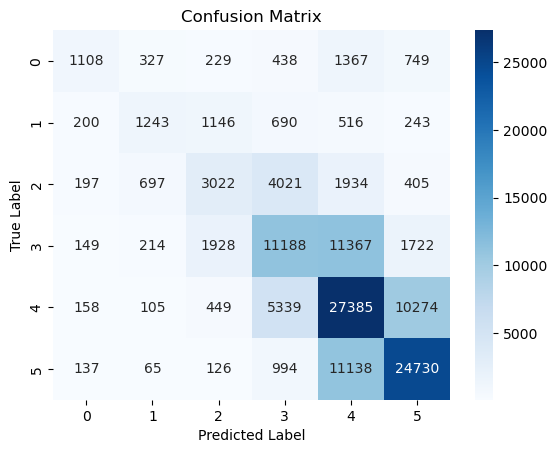

              precision    recall  f1-score   support

           0       0.57      0.26      0.36      4218
           1       0.47      0.31      0.37      4038
           2       0.44      0.29      0.35     10276
           3       0.49      0.42      0.45     26568
           4       0.51      0.63      0.56     43710
           5       0.65      0.66      0.66     37190

    accuracy                           0.55    126000
   macro avg       0.52      0.43      0.46    126000
weighted avg       0.54      0.55      0.54    126000



In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Create a confusion matrix
cm = confusion_matrix(valid_y,y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df["rating"]), yticklabels=np.unique(df["rating"]))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print(classification_report(valid_y,y_pred))